<a href="https://colab.research.google.com/github/pawlenn/Proyek-Machine-Learning/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Fauren_Athira_Khanza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
home_df = pd.read_csv("Dataset_clustering.csv")

In [ ]:
home_df.sample(10)

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,CouncilArea,Lattitude,Longtitude,Propertycount,Price_Bin,Landsize_Bin,Distance_Bin,Type,Regionname,Cluster
2636,Yarraville,76 Kidman St,4.666667,4.119607e+06,PI,Biggin,27/06/2016,21.200025,3013.0,3.0,...,Maribyrnong City Council,-37.816148,144.729400,6543.0,Sedang,Besar,Sedang,t,Western Metropolitan,2
2400,Sunshine West,1/40 Warmington Rd,4.666667,1.026894e+06,SP,Jellis,27/06/2016,32.417631,3020.0,3.0,...,Brimbank City Council,-37.794462,144.655000,6763.0,Murah,Sedang,Jauh,t,Western Metropolitan,2
4168,Avondale Heights,9 Thompson St,6.500000,5.425123e+06,S,Moonee,15/07/2017,26.329349,3034.0,4.0,...,Moonee Valley City Council,-37.725959,144.714787,4502.0,Sedang,Besar,Sedang,t,Western Metropolitan,2
3990,Mill Park,15 Mockridge Dr,8.333333,4.316931e+06,S,Ray,8/07/2017,37.416419,3082.0,5.0,...,Whittlesea City Council,-37.543520,145.087337,10529.0,Sedang,Besar,Jauh,t,Northern Metropolitan,0
1549,Kew,7 Heather Gr,8.333333,9.448543e+06,VB,hockingstuart,27/11/2016,17.571428,3101.0,5.0,...,Boroondara City Council,-37.802845,145.105593,10331.0,Mahal,Besar,Sedang,t,Southern Metropolitan,1
2450,Templestowe Lower,315 Thompsons Rd,4.666667,6.694178e+06,S,Barry,7/11/2016,32.803906,3107.0,3.0,...,Manningham City Council,-37.725576,145.198878,5420.0,Sedang,Besar,Jauh,t,Northern Metropolitan,3
6544,Hillside,10 Castlewellan Bvd,10.166667,5.491875e+06,PI,Barry,24/02/2018,37.515957,3037.0,6.0,...,Brimbank City Council,-37.596770,144.475488,5556.0,Sedang,Besar,Jauh,t,Western Metropolitan,2
5852,Lalor,25 Franklin Rd,6.500000,4.154644e+06,S,HAR,9/12/2017,35.747937,3075.0,4.0,...,Whittlesea City Council,-37.555238,144.990217,8279.0,Sedang,Besar,Jauh,t,Northern Metropolitan,0
4923,Bundoora,37 Greenwood Dr,6.500000,4.889520e+06,S,Ray,26/08/2017,30.502410,3083.0,4.0,...,Banyule City Council,-37.622884,145.095597,10175.0,Sedang,Besar,Jauh,t,Northern Metropolitan,0
5856,Maribyrnong,5 Scenic Pl,6.500000,7.937361e+06,S,Nelson,9/12/2017,13.433718,3032.0,4.0,...,Maribyrnong City Council,-37.724173,144.776424,4918.0,Mahal,Besar,Dekat,t,Western Metropolitan,2


In [ ]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6644 non-null   object 
 1   Address        6644 non-null   object 
 2   Rooms          6644 non-null   float64
 3   Price          6644 non-null   float64
 4   Method         6644 non-null   object 
 5   SellerG        6644 non-null   object 
 6   Date           6644 non-null   object 
 7   Distance       6644 non-null   float64
 8   Postcode       6644 non-null   float64
 9   Bedroom2       6644 non-null   float64
 10  Bathroom       6644 non-null   float64
 11  Car            6644 non-null   float64
 12  Landsize       6644 non-null   float64
 13  BuildingArea   6644 non-null   float64
 14  YearBuilt      6644 non-null   float64
 15  CouncilArea    6644 non-null   object 
 16  Lattitude      6644 non-null   float64
 17  Longtitude     6644 non-null   float64
 18  Property

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Menghapus kolom yang tidak relevan seperti 'Address' dan 'Date'
X = home_df.drop(columns=['Cluster', 'Address', 'Date'])
y = home_df['Cluster']

categorical_cols = ['Suburb', 'Method', 'SellerG', 'CouncilArea', 'Type', 'Regionname']
X = pd.get_dummies(X, columns=categorical_cols)

In [ ]:
binning_cols = ['Price_Bin', 'Landsize_Bin', 'Distance_Bin']
# mengubah kategori menjadi angka
label_encoders = {}
for col in binning_cols:
    if col in X.columns:  # Pastikan kolom ada di dataset
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le  # Simpan encoder untuk referensi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### **Penjelasan Singkat tentang Random Forest dan XGBoost**

#### **1. Random Forest**
Random Forest adalah model ensemble yang terdiri dari banyak pohon keputusan (decision trees). Setiap pohon keputusan dihasilkan dari subset acak dari data pelatihan dan subset acak dari fitur yang ada.

- **Proses Kerja:**
  1. **Bagging (Bootstrap Aggregating)**: Menggunakan sampling acak dengan pengembalian (bootstrap) untuk menghasilkan beberapa subset data dari dataset pelatihan.
  2. **Pembuatan Pohon Keputusan**: Setiap pohon keputusan dibuat berdasarkan subset data yang berbeda. Fitur juga dipilih secara acak di setiap pembelahan pohon.
  3. **Voting untuk Prediksi**: Setelah semua pohon dilatih, hasil prediksi (untuk klasifikasi) diambil dari voting mayoritas pohon, sementara untuk regresi, prediksi adalah rata-rata dari semua pohon.

#### **2. XGBoost (Extreme Gradient Boosting)**
XGBoost adalah algoritma boosting yang sangat populer dan kuat, yang menggunakan teknik gradient boosting untuk mengoptimalkan model.

- **Proses Kerja:**
  1. **Boosting**: Menghasilkan pohon keputusan secara iteratif, di mana setiap pohon berikutnya berusaha untuk mengoreksi kesalahan yang dilakukan oleh pohon sebelumnya.
  2. **Gradient Descent**: Setiap pohon baru dibangun untuk meminimalkan kesalahan (loss function) yang diukur dengan gradien, yaitu perubahan yang dibutuhkan untuk memperbaiki prediksi model.
  3. **Regularisasi**: XGBoost juga menggunakan regularisasi (L1 dan L2) untuk mengurangi overfitting dan membuat model lebih robust.


In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Train XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Random Forest Model Performance:
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000



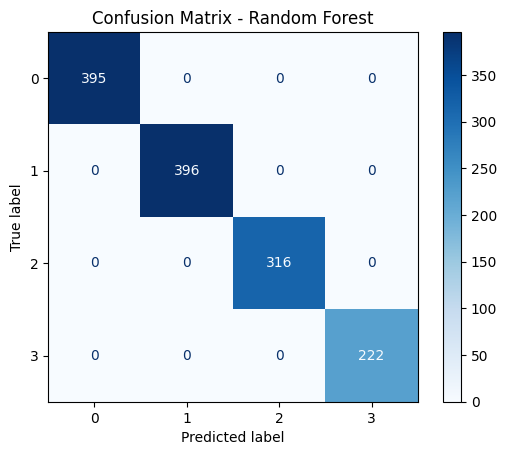

XGBoost Model Performance:
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000



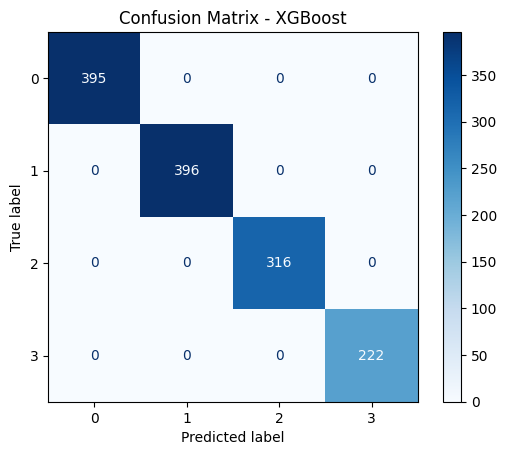

In [ ]:
def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"{name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}\n")

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Identifikasi kolom kategorikal dan numerik
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Setup cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ========== Random Forest Hyperparameter Tuning ==========
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_dist_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(
    rf_pipeline, param_dist_rf, n_iter=5, cv=cv, verbose=1, n_jobs=-1, random_state=42, error_score='raise'
)

best_rf_model = random_search_rf.fit(X_train, y_train)

# ========== XGBoost Hyperparameter Tuning ==========
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

param_dist_xgb = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.1]
}

random_search_xgb = RandomizedSearchCV(
    xgb_pipeline, param_dist_xgb, n_iter=5, cv=cv, verbose=1, n_jobs=-1, random_state=42, error_score='raise'
)

best_xgb_model = random_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Random Forest Evaluation Metrics:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0

Confusion Matrix (Random Forest):
[[395   0   0   0]
 [  0 396   0   0]
 [  0   0 316   0]
 [  0   0   0 222]]


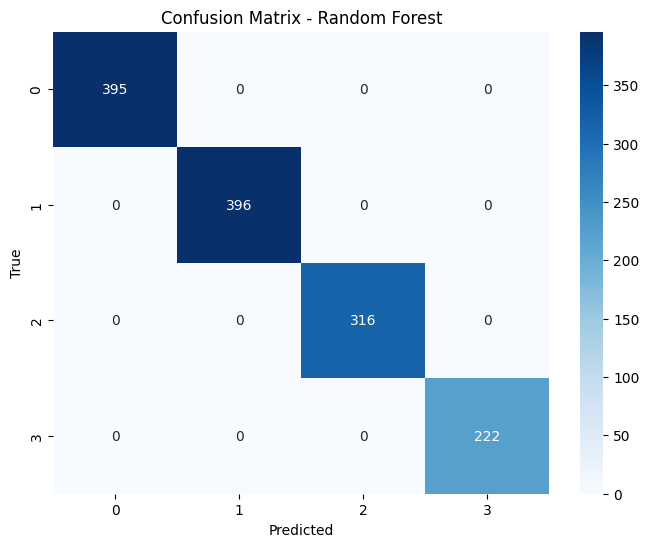


XGBoost Evaluation Metrics:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0

Confusion Matrix (XGBoost):
[[395   0   0   0]
 [  0 396   0   0]
 [  0   0 316   0]
 [  0   0   0 222]]


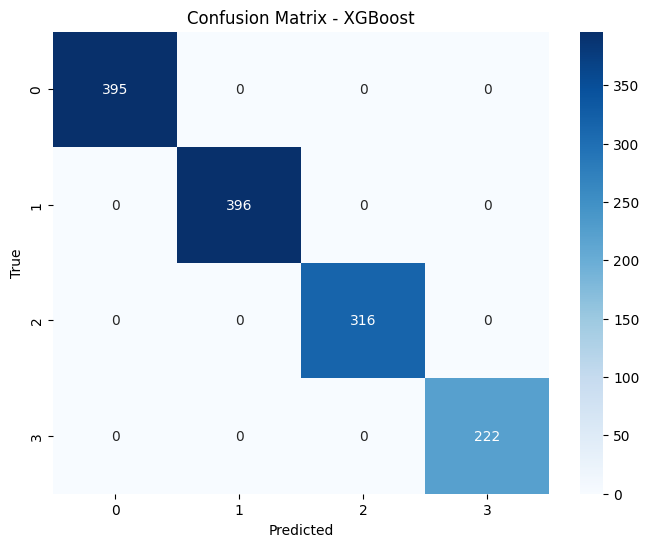

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi untuk Random Forest
if 'best_rf_model' in locals():
    y_pred_rf = best_rf_model.predict(X_test)
    print("Random Forest Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
    print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))

    cm_rf = confusion_matrix(y_test, y_pred_rf)
    print("\nConfusion Matrix (Random Forest):")
    print(cm_rf)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm_rf)), yticklabels=range(len(cm_rf)))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix - Random Forest")
    plt.show()

# Evaluasi untuk XGBoost
if 'best_xgb_model' in locals():
    y_pred_xgb = best_xgb_model.predict(X_test)
    print("\nXGBoost Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
    print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))

    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    print("\nConfusion Matrix (XGBoost):")
    print(cm_xgb)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm_xgb)), yticklabels=range(len(cm_xgb)))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix - XGBoost")
    plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

# **Analisis Hasil Evaluasi Model Klasifikasi**

## 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

Pada tahap ini, kita telah melatih model menggunakan **Random Forest** dan **XGBoost**.

Hasil evaluasi model setelah tuning menunjukkan bahwa skor untuk semua metrik (**Accuracy**, **F1 Score**, **Precision**, dan **Recall**) dan untuk kedua model, hasilnya adalah **1.0**.

- **Accuracy**: 1.0
- **F1 Score**: 1.0
- **Precision**: 1.0
- **Recall**: 1.0

Untuk meningkatkan performa model, kita melakukan **hyperparameter tuning** menggunakan **RandomizedSearchCV** untuk menemukan kombinasi hyperparameter terbaik.

### Tuning dengan RandomizedSearchCV:
Metode **RandomizedSearchCV** digunakan untuk mengeksplorasi ruang hyperparameter model dengan lebih efisien. Alih-alih mencoba setiap kombinasi seperti pada **GridSearchCV**, **RandomizedSearchCV** mengambil sampel secara acak dari distribusi hyperparameter yang didefinisikan, mengurangi waktu pencarian dan tetap memberikan hasil yang baik. Kami mengonfigurasi pencarian untuk menemukan hyperparameter terbaik pada **Random Forest** dan **XGBoost**.

Hasil evaluasi model setelah tuning menunjukkan bahwa skor untuk semua metrik (**Accuracy**, **F1 Score**, **Precision**, dan **Recall**) adalah **1.0**.

- **Accuracy**: 1.0
- **F1 Score**: 1.0
- **Precision**: 1.0
- **Recall**: 1.0

Nilai **1.0** yang sempurna pada semua metrik ini menunjukkan bahwa model berhasil mengklasifikasikan semua data uji dengan benar. Ini adalah hasil yang luar biasa, namun perlu diperhatikan bahwa nilai sempurna ini mungkin menunjukkan adanya masalah lain dalam evaluasi model.

**Perbandingan Sebelum dan Setelah Tuning**:
Karena sebelumnya hasilnya sudah menunjukkan nilai evaluasi yang sempurna, maka setelah tunning pun menghasilkan evaluasi model dengan nilai yang sama. Namun, karena evaluasi menunjukkan nilai **1.0** pada semua metrik, kita perlu memeriksa lebih lanjut apakah model mengalami masalah lain seperti **overfitting** atau **underfitting**.

## 2. Identifikasi Kelemahan Model

Walaupun model menunjukkan nilai **1.0** pada semua metrik evaluasi, ada beberapa kemungkinan kelemahan yang perlu dikaji lebih lanjut untuk memastikan model tidak mengalami masalah yang tersembunyi, seperti:

### a. Kelemahan yang Mungkin Tidak Terlihat (Overfitting atau Underfitting)
- **Overfitting**: Model mungkin terlalu "terlatih" pada data pelatihan, menyebabkan model mengingat setiap detail data pelatihan dan gagal untuk generalisasi dengan baik pada data baru. Jika kita hanya menguji model pada satu set data uji yang tidak cukup beragam, hasil yang sempurna ini bisa menunjukkan bahwa model terlalu cocok dengan data pelatihan.
- **Underfitting**: Meskipun hasil evaluasi menunjukkan performa yang sangat baik, kita tidak bisa sepenuhnya menyingkirkan kemungkinan model terlalu sederhana atau tidak mampu menangkap pola yang lebih kompleks dalam data.

### b. Data Uji Tidak Mewakili Variasi Dunia Nyata
- **Ketidakseimbangan Kelas**: Meskipun hasil evaluasi menunjukkan nilai **1.0**, bisa jadi data uji memiliki distribusi kelas yang sangat seimbang, sehingga model hanya perlu memprediksi sebagian besar kelas dengan benar. Namun, dalam dunia nyata, distribusi kelas bisa lebih tidak seimbang, dan model mungkin gagal untuk mengklasifikasikan kelas minoritas dengan benar.
- **Variasi Data Uji**: Dataset uji yang terlalu kecil atau tidak cukup beragam dapat menyebabkan model bekerja lebih baik daripada yang seharusnya. Oleh karena itu, penting untuk melakukan validasi silang untuk memastikan model berperforma baik di berbagai kondisi.

### c. Model Terkunci pada Data Pelatihan
Model bisa jadi hanya mengingat data pelatihan jika dataset tersebut kecil atau tidak beragam. Dalam hal ini, meskipun evaluasi pada data uji memberikan hasil yang sempurna, kita perlu memastikan bahwa model dapat mengatasi kondisi data yang lebih beragam dan belum pernah dilihat sebelumnya.

## 3. Rekomendasi Tindakan Lanjutan

Berdasarkan hasil evaluasi yang menunjukkan nilai **1.0** pada semua metrik evaluasi, berikut adalah beberapa langkah yang bisa diambil untuk meningkatkan model:

### a. Mengumpulkan Data Lebih Banyak
Model dengan hasil yang sempurna pada data uji mungkin berisiko overfitting jika dataset yang digunakan terlalu kecil atau tidak beragam. Oleh karena itu, **mengumpulkan data tambahan** dan meningkatkan variasi data dalam pelatihan akan membantu model untuk lebih generalisabel dan tidak terlalu bergantung pada data pelatihan yang terbatas.

### b. Eksplorasi Algoritma Lain
Walaupun **Random Forest** dan **XGBoost** menunjukkan performa yang sangat baik, cobalah untuk mengeksplorasi **algoritma lain** yang mungkin lebih cocok dengan masalah ini. Beberapa algoritma lain yang bisa dipertimbangkan termasuk:
- **Support Vector Machine (SVM)**: Dikenal baik untuk masalah klasifikasi dengan banyak fitur atau dimensi tinggi.
- **Logistic Regression**: Sebuah model yang sederhana dan cepat, sangat efektif untuk masalah klasifikasi dengan dua kelas.
- **Neural Networks**: Jika data sangat besar dan kompleks, neural networks dapat menangkap pola yang lebih kompleks.

### c. Regularisasi untuk Mencegah Overfitting
Jika model menunjukkan tanda-tanda **overfitting**, langkah berikutnya adalah menerapkan **regularisasi**. Pada model **Random Forest**, kita bisa mencoba mengatur parameter seperti **max_depth**, **min_samples_split**, dan **min_samples_leaf**. Untuk **XGBoost**, kita bisa mengatur **max_depth**, **learning_rate**, dan **n_estimators** untuk mengurangi kompleksitas model dan memperbaiki kemampuan generalisasi.

### d. Validasi Silang (Cross-Validation)
Untuk memastikan bahwa model bekerja dengan baik di berbagai subset data, sangat disarankan untuk melakukan **cross-validation**. Ini akan memberikan gambaran yang lebih baik mengenai performa model pada data yang lebih bervariasi dan mengurangi kemungkinan overfitting pada data uji tertentu.

Dengan langkah-langkah tersebut, model akan lebih kuat dan dapat mengatasi tantangan dunia nyata dengan lebih efektif.

